# Labels (genres) EDA

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import os

In [24]:
df = pd.read_csv('../data/dataset_filtered_labels.csv')
print(df)


       Unnamed: 0   wiki_id     frbs_id                            name  \
0               0       620     /m/0hhy                     Animal Farm   
1               1       843     /m/0k36              A Clockwork Orange   
2               2       986     /m/0ldx                      The Plague   
3               3      2080     /m/0wkt            A Fire Upon the Deep   
4               4      2152     /m/0x5g  All Quiet on the Western Front   
...           ...       ...         ...                             ...   
11401       11401  36126792   /m/044psh               Gates of Paradise   
11402       11402  36372465  /m/02vqwsp                  The Third Lynx   
11403       11403  36534061   /m/072y44                  Remote Control   
11404       11404  37054020  /m/04f1nbs               Transfer of Power   
11405       11405  37122323  /m/0n5236t                         Decoded   

                     author        date  \
0             George Orwell  1945-08-17   
1           A

In [25]:
genres = df['genres'].copy()
print(genres)

0        ['realistic fiction', "children's literature",...
1                             ['science fiction', 'humor']
2                                    ['realistic fiction']
3                           ['science fiction', 'fantasy']
4                      ['historical', 'realistic fiction']
                               ...                        
11401                                           ['horror']
11402                                  ['science fiction']
11403                                         ['thriller']
11404                                         ['thriller']
11405                                      ['non-fiction']
Name: genres, Length: 11406, dtype: object


In [26]:
# genres of each book are represented as a string representation of list, so it needs to be converted to list
unique_genres_unfiltered = set()
for index, value in genres.items():
    genres_lowercase = [genre.lower() for genre in ast.literal_eval(value)]
    genres[index] = genres_lowercase
    unique_genres_unfiltered.update(genres_lowercase)

In [27]:
print('There are ', str(len(unique_genres_unfiltered)), 'book genres in the data set.')

There are  15 book genres in the data set.


In [28]:
# Counting the number of books of each genre
def GetGenresFrequencies(unique_genres, genres):
    """
    Input: 
        unique_genres: list/set of the possible genres
        genres: lebels(genres) of the books in the data set
    
    Output: Sorted dictionary of the book genres(keys) and their frequencies(values) in the data set
    """
    genre_freq= {}
    for genre in unique_genres:
        for index, genres_list in genres.items():
            genre_count = genres_list.count(genre)
            if genre not in genre_freq:
                genre_freq[genre] = genre_count
            else:
                genre_freq[genre] = genre_freq.get(genre) + genre_count  
                
    # Sort the frequency of the genres dictionart, such that most frequent ones appear first
    genre_freq_sorted = dict(sorted(genre_freq.items(), key=lambda item: item[1], reverse=True))

    return genre_freq_sorted

In [29]:
genre_freq_unfiltered = GetGenresFrequencies(unique_genres_unfiltered, genres)
print(genre_freq_unfiltered)

{'science fiction': 2967, 'realistic fiction': 2516, 'fantasy': 2487, "children's literature": 2122, 'mystery': 1396, 'crime': 1303, 'thriller': 1198, 'historical': 1001, 'horror': 594, 'non-fiction': 518, 'romance': 482, 'humor': 358, 'adventure': 333, 'western': 59, 'coming of age': 53}


In [30]:
def PrintBooksOfCertainGenre(genre):
    """
    Input: genre: type - string, specifies the genre for the book query
    """
    for index, genres_list in genres.items():
        if genres_list.count(genre)>0:
            print(df.loc[df.index[index], 'name'])

In [31]:
def PrintAllGenresOfBookWihCertainGenre(genre):
    """
    Input: genre - type:string, specifies the genre for the book query
    """
    for index, genres_list in genres.items():
        if genres_list.count(genre)>0:
            print(df.loc[df.index[index], ['name', 'genres']])

# Cleaning the data set (based on labels)

In [32]:
# Set all lebels in the dataframe to the lowercase
for index in df.index:
    genres_lowercase = [genre.lower() for genre in ast.literal_eval(df.at[index,'genres'])]
    df.at[index,'genres'] = genres_lowercase

In [33]:
# Drop books that are not labeled
df = df[df['genres'].map(lambda d: len(d)) > 0]
df.reset_index(drop=True, inplace=True)

In [34]:
df

,Unnamed: 0,wiki_id,frbs_id,name,author,date,genres,summary
0,0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[realistic fiction, children's literature, humor]","Old Major, the old boar on the Manor Farm, cal..."
1,1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[science fiction, humor]","Alex, a teenager living in near-future England..."
2,2,986,/m/0ldx,The Plague,Albert Camus,1947,[realistic fiction],The text of The Plague is divided into five pa...
3,3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[science fiction, fantasy]",The novel posits that space around the Milky W...
4,4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[historical, realistic fiction]","The book tells the story of Paul Bäumer, a Ger..."
...,...,...,...,...,...,...,...,...
11401,11401,36126792,/m/044psh,Gates of Paradise,V. C. Andrews,1989-06,[horror],"A novel about Annie Stonewall, the daughter of..."
11402,11402,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,[science fiction],"The story starts with former government agent,..."
11403,11403,36534061,/m/072y44,Remote Control,Andy McNab,1997,[thriller],The series follows the character of Nick Stone...
11404,11404,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,[thriller],The reader first meets Rapp while he is doing ...


## Label filtering and mapping 

The most unfrequent and the broadest genres (which would make the data set extremely imbalanced) are dropped, and the rest are grouped around the broader genres.

In [35]:
genre_mapping = {
                 'science fiction':'science fiction',                      
                 'fantasy':'fantasy',                
                 'mystery':'mystery',
                 'thriller':'thriller',
                 'crime':'crime',
                 'historical':'historical',
                 'non-fiction':'non-fiction',
                 'realistic fiction':'realistic fiction',
                 "children's literature":"children's literature",
                 'horror':'',
                 'romance':'', 
                 'adventure':'',
                 'humor':'',
                 'western':'',
                 'coming of age':'',              
                }

In [36]:
df['genres'].items()

In [40]:
# Map the genres as specified in the genre_mapping

for index, value in df['genres'].items():   
    l_new = list()
    for elem in value:
        l_new.append(genre_mapping.get(elem)) 
    df.at[index,'genres'] = l_new

In [42]:
for idx, gnr in df['genres'].items():
    
    # Checking if there are some duplicated labels (as multiple labels from the original data set could have been
    # mapped to one label) for the book and dropping them
    non_duplicate_genres = list(set(gnr))
    df.at[idx,'genres'] = non_duplicate_genres

    # Cleaning None values in the genre lists
    df.at[idx,'genres'] = [i for i in non_duplicate_genres if i is not None]
        


In [43]:
df.at[73,'genres'] 

[]

In [44]:
df.at[127,'genres']

['realistic fiction']

In [45]:
df.at[11401,'genres'] 

[]

In [46]:
# Drop books
df = df[df['genres'].map(lambda d: len(d)) > 0]
df.reset_index(drop=True, inplace=True)

In [47]:
df

,Unnamed: 0,wiki_id,frbs_id,name,author,date,genres,summary
0,0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[realistic fiction, children's literature]","Old Major, the old boar on the Manor Farm, cal..."
1,1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,[science fiction],"Alex, a teenager living in near-future England..."
2,2,986,/m/0ldx,The Plague,Albert Camus,1947,[realistic fiction],The text of The Plague is divided into five pa...
3,3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[fantasy, science fiction]",The novel posits that space around the Milky W...
4,4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[historical, realistic fiction]","The book tells the story of Paul Bäumer, a Ger..."
...,...,...,...,...,...,...,...,...
10787,11398,35993963,/m/0jzxgsx,The Bourne Imperative,Robert Ludlum,2012-06-05,"[thriller, crime]",:For a more detailed background of the main ch...
10788,11402,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,[science fiction],"The story starts with former government agent,..."
10789,11403,36534061,/m/072y44,Remote Control,Andy McNab,1997,[thriller],The series follows the character of Nick Stone...
10790,11404,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,[thriller],The reader first meets Rapp while he is doing ...


In [48]:
unique_genres = set()
for index, value in df['genres'].items():
    unique_genres.update(value)
print('There are ', str(len(unique_genres)), 'book genres in the data set.')


There are  9 book genres in the data set.


In [49]:
genre_freq = GetGenresFrequencies(unique_genres, df['genres'])
print(genre_freq)

{'science fiction': 2967, 'realistic fiction': 2516, 'fantasy': 2487, "children's literature": 2122, 'mystery': 1396, 'crime': 1303, 'thriller': 1198, 'historical': 1001, 'non-fiction': 518}


In [51]:
# Saving the modified data set
os.chdir('..')
df.to_csv('./data/dataset_refiltered_9_labels.csv')

## Visualisations

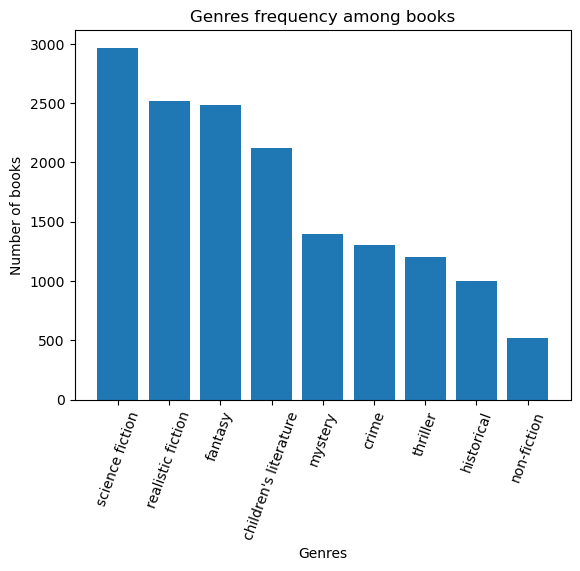

In [50]:
plt.bar(range(len(genre_freq)), list(genre_freq.values()), align='center')
plt.xticks(range(len(genre_freq)), list(genre_freq.keys()))
plt.xticks(rotation=70)
plt.title('Genres frequency among books')
plt.xlabel('Genres')
plt.ylabel('Number of books')
plt.show()

**Conclusion**: The dataset is rather imbalanced, which should be taken into account when implementing the models.